# Viktor Veselov

In [ ]:
#@title Loading the required libraries

import numpy as np # Pandas for array manipulation
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt # Matplotlib for subplots
%matplotlib inline
from tqdm.auto import tqdm
tqdm.pandas(desc = 'Proceesing rows')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Import for feature standardization
from sklearn.decomposition import PCA # Import for PCA generation
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers

In [ ]:
#@title Mounting your Google Drive to Colab
tqdm.pandas(desc = 'Proceesing rows')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import random

In [ ]:
import os
os.chdir(r'/content/drive/My Drive/')

In [ ]:
tqdm.pandas(desc = 'Proceesing rows')
df0= pd.read_csv("application_train.csv")

In [ ]:
df0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
print(df0.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [ ]:
df1 = df0.dropna()
df1.to_csv('df1.csv')

In [ ]:
#@title Designating target and features

y = df1.TARGET # Target variable
X = df1.drop(columns=['TARGET']) # Features by dropping the target column

In [ ]:
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X = X[numeric_columns]

In [ ]:
#@title Standardizing the data

# Standardizing is needed as most clustering techniques depend on distance measures and hence differently scaled features can skew their importance
sc = StandardScaler() # Create scaler object
std_X = sc.fit_transform(X) # Apply to data. Note: an array is returned
X = pd.DataFrame(data=std_X, columns=X.columns) # Convert array back to DataFrame

In [ ]:
#@title Generating Principal Components

pca = PCA(n_components=10) # Create PCA object with best of 10 n_components
pca_db_comp = pca.fit_transform(X) # Generate the Principle Components of data

In [ ]:
# Building a dataframe from the Principal Components array

pca_db_cols = [] # Initialize an empty array to hold the column names
for i in range(0, len(pca_db_comp[0])): # Iterate through the number of columns in the array
  pca_db_cols.append("PC"+str(i)) # Build and append column names
pca_db_df = pd.DataFrame(data=pca_db_comp, columns=pca_db_cols)
pca_db_df

PC0       PC1       PC2        PC3       PC4       PC5       PC6  \
0      0.311091 -1.724672 -1.292650  -0.160631  0.779331  1.955693  2.505750   
1     -1.501658  1.496052 -0.585869  -0.267665  0.014753  1.035215  1.378204   
2     23.984753 -0.020259  1.887445  14.907894 -1.383692  0.519762 -1.288649   
3      8.751721  1.698596 -2.166822  -2.470384  0.060426  1.128440  0.738390   
4      8.065604 -4.127803  1.612713  -0.676087  3.970189 -1.924141  1.660415   
...         ...       ...       ...        ...       ...       ...       ...   
8597  -0.681024  0.220952 -3.473548   0.842908  0.441358 -2.873116 -1.305321   
8598   2.695941  2.027519 -1.951521  -0.419680 -0.270925  0.850321 -0.267622   
8599  -2.325932 -0.491475 -0.581451  -0.250065 -0.906459  0.409683  4.095963   
8600  -5.387192  0.216342  0.603408   0.072546 -0.572868  1.020739 -1.745255   
8601  -3.823475 -0.677153  1.634907   0.119240  0.998403  0.922802 -0.912973   

           PC7       PC8       PC9  
0    -0.519839  0.558953  0.565886  
1    -1.345542  0.656855  0.165969  
2    -1.992768 -2.821566 -9.782906  
3     2.966040  2.367757 -2.613280  
4     0.974584 -0.486454  3.035785  
...        ...       ...       ...  
8597 -0.437876 -1.179333  0.276456  
8598  0.720964 -0.720006  0.705223  
8599 -1.100831  0.281581  0.431484  
8600 -1.381568  2.229571 -0.244572  
8601 -0.161807  0.041033 -0.343356  

[8602 rows x 10 columns]

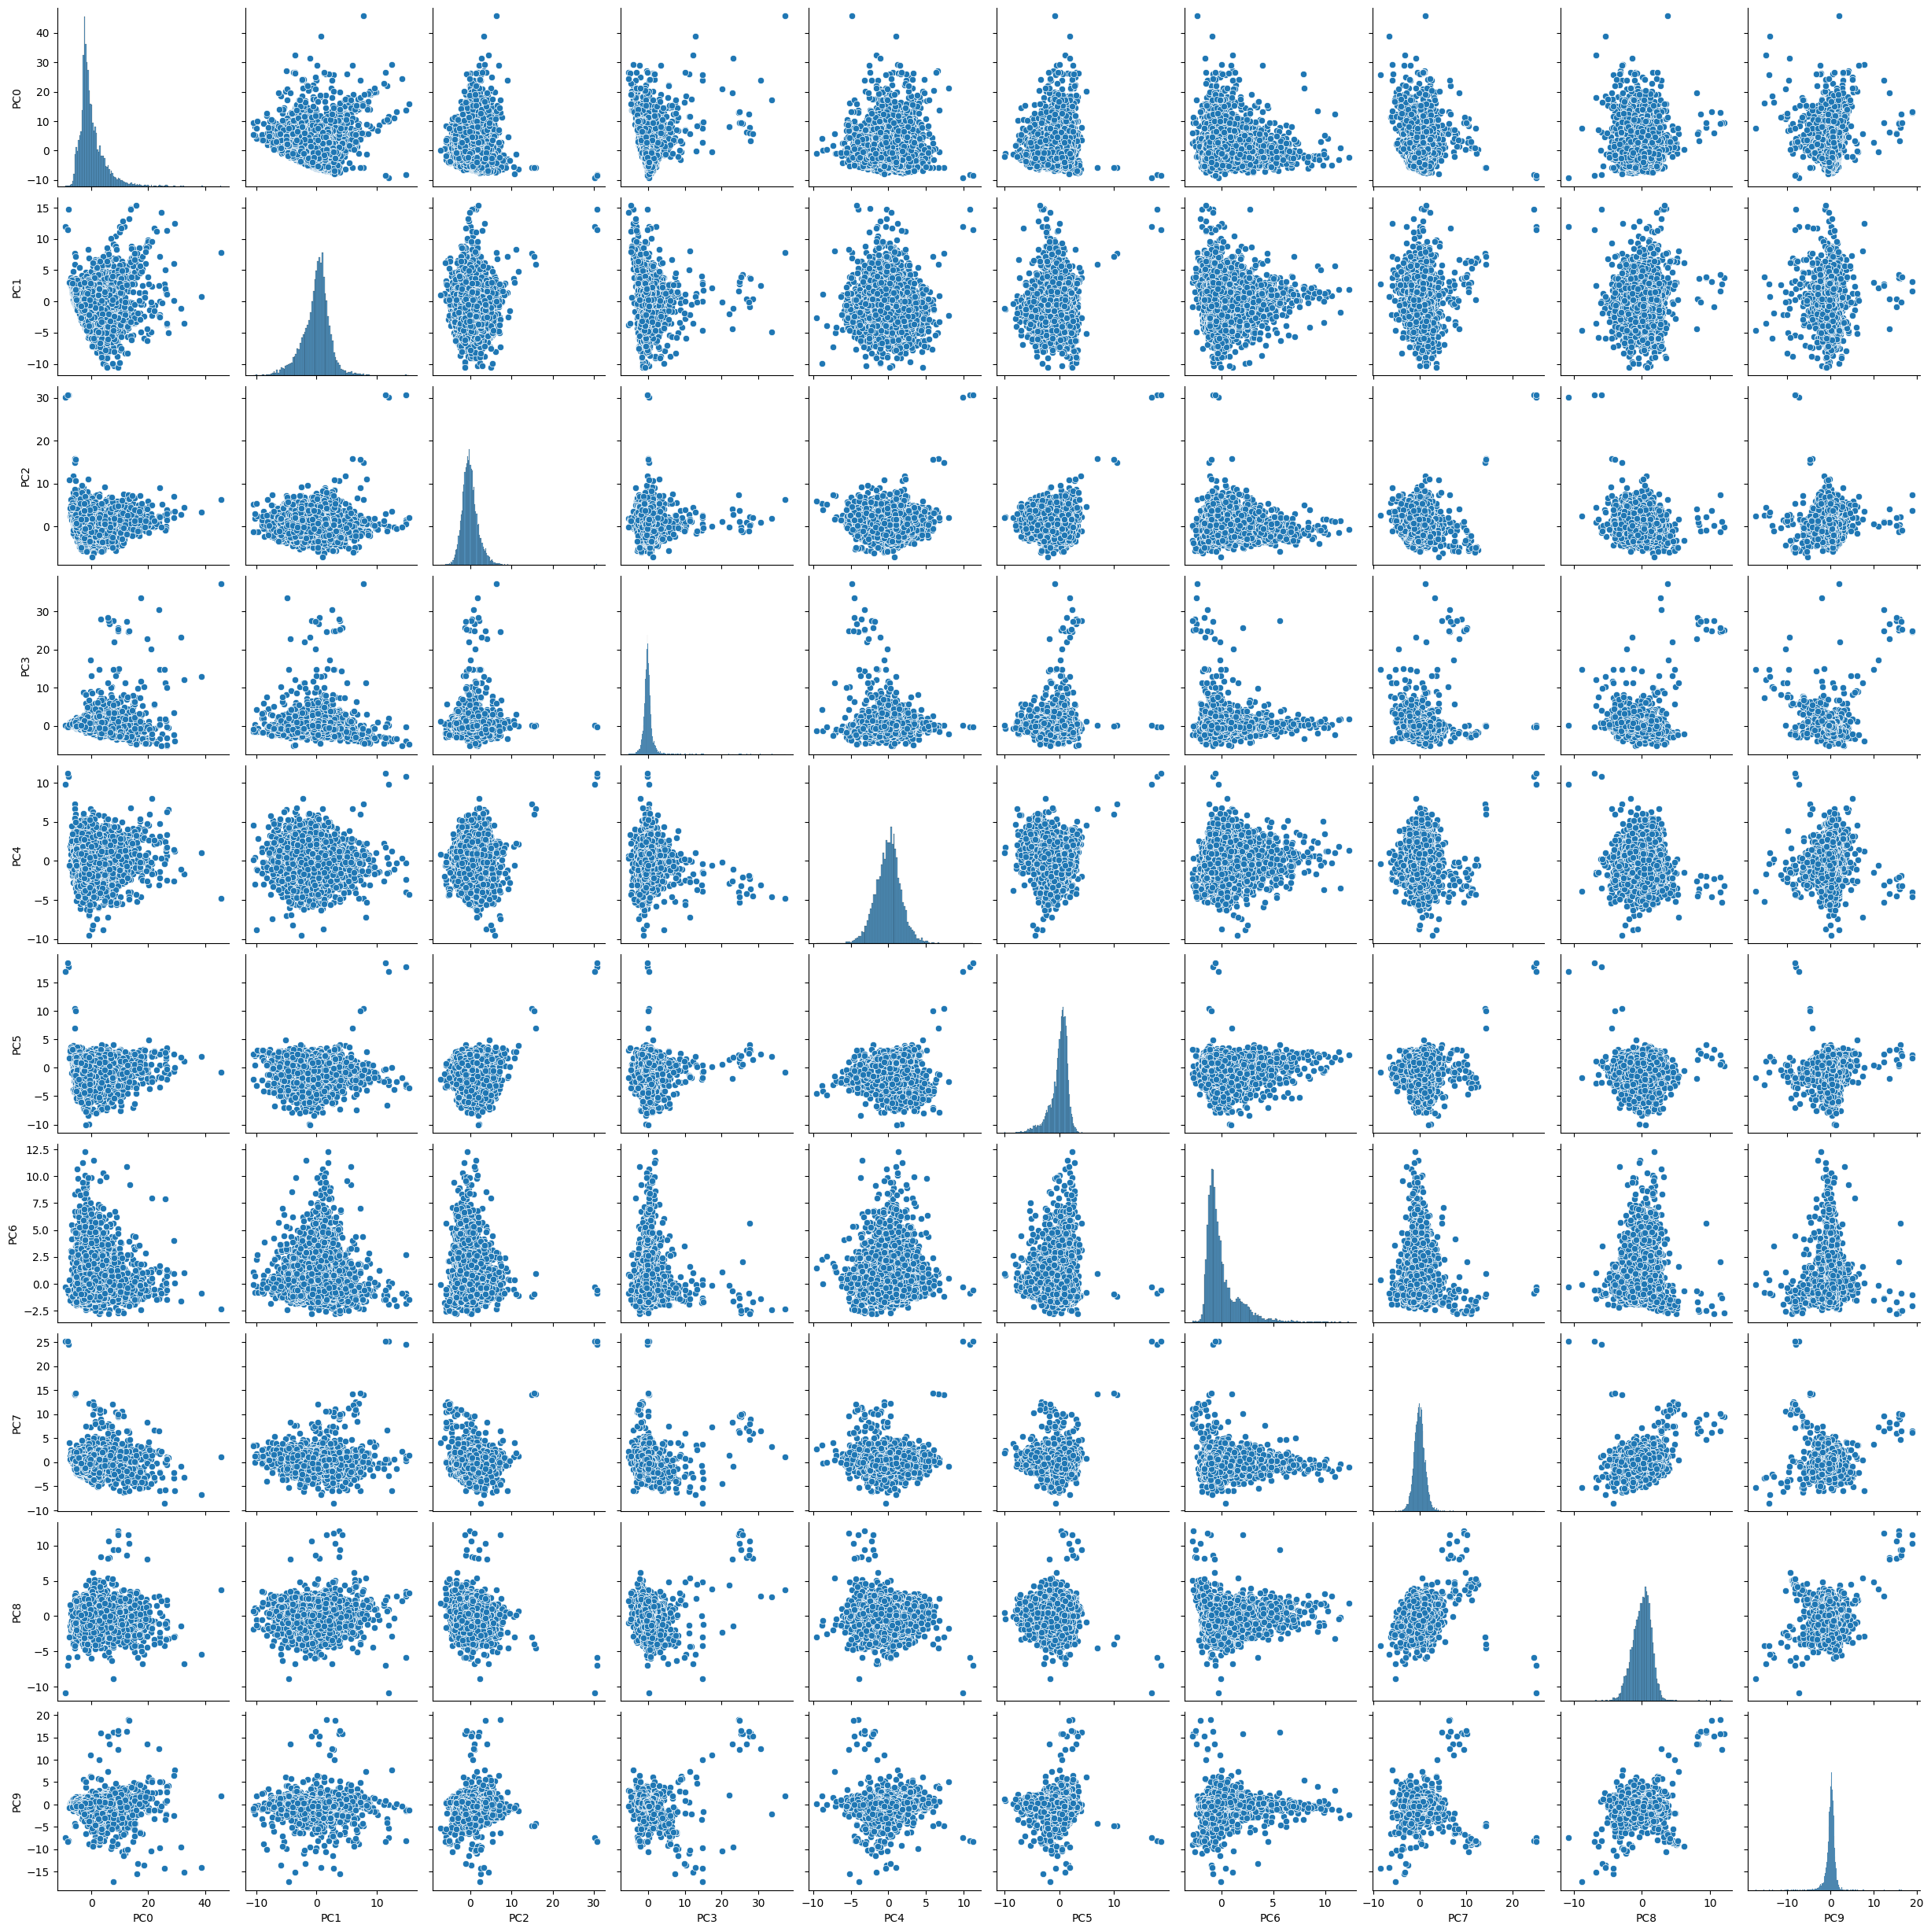

In [ ]:
#@title Ploting the Principal Components

sns.pairplot(pca_db_df)

# Find n_cluster (Elbow + Silhouette)

To insure integrity and quality of our finding we should apply to methods Elbow and Silhouette. It is rare, but sometimes one of those method is spooky and may miss lead.

In [ ]:
#@title Elbow Method

from sklearn.cluster import KMeans


# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

    sse.append(curr_sse)
  return sse

In [ ]:
df3 = df3.dropna()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

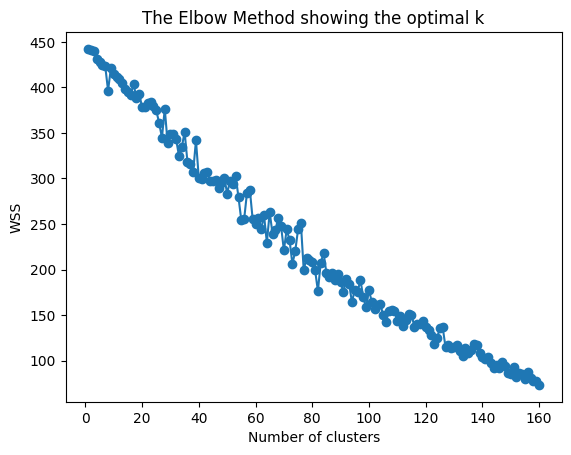

In [ ]:
# @title Elbow Method
import matplotlib.pyplot as plt
import numpy as np

# Assuming df2 is your data and is already appropriately preprocessed

# Convert dataframe to numpy array for this function
points = df3.values

# Decide range of k values
kmax = 160

# Calculate WSS for different numbers of clusters
sse = calculate_WSS(points, kmax)

# Plot
plt.plot(range(1, kmax+1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Elbow method indicates that the best number of clusters is 160+

In [ ]:
# @title Silhouette Method
from sklearn.metrics import silhouette_score

sil = []
kmax = 160

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df3)
  labels = kmeans.labels_
  sil.append(silhouette_score(df3, labels, metric = 'euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

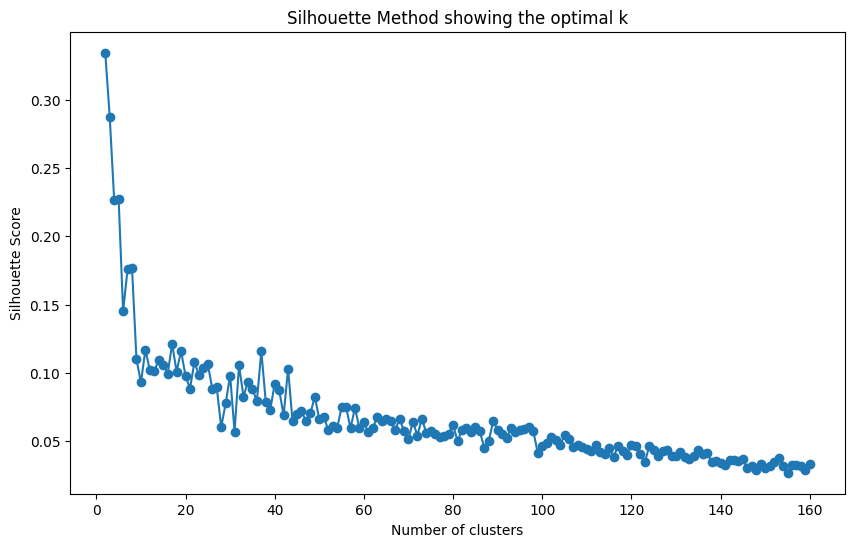

In [ ]:
# @title Silhouette Method
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, kmax+1), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method showing the optimal k')
plt.show()


Silhouette Method indicating that the best n_cluster is 2. Which contrudicting an Elbow method. As a result we will try both 160 and 2 n_clusters

In [ ]:
from sklearn.metrics import pairwise_distances

# calculate pairwise distance matrix
distance_matrix = pairwise_distances(df3, metric='euclidean')

# print distance matrix
distance_matrix


array([[ 0.        , 22.1313179 ,  6.57771119, ..., 20.26785293,
        21.83658575, 25.33122511],
       [22.1313179 ,  0.        , 22.29611123, ..., 12.82009172,
        12.42661023, 23.20928258],
       [ 6.57771119, 22.29611123,  0.        , ..., 20.8835374 ,
        22.15493988, 26.38973999],
       ...,
       [20.26785293, 12.82009172, 20.8835374 , ...,  0.        ,
        11.01085406, 25.11234824],
       [21.83658575, 12.42661023, 22.15493988, ..., 11.01085406,
         0.        , 22.14348774],
       [25.33122511, 23.20928258, 26.38973999, ..., 25.11234824,
        22.14348774,  0.        ]])

We observed that a distance between data points is fairly vast. It also mean that our eigenvalue is not closed to 1.

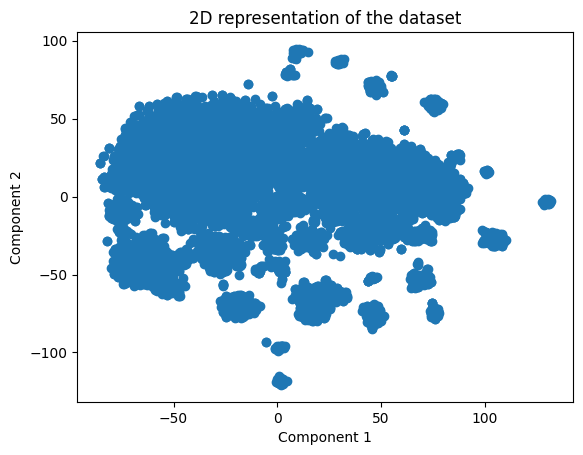

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming that df is your DataFrame and it's already been normalized
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)  # Reduce to two components
transformed_data = tsne.fit_transform(X)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D representation of the dataset')
plt.show()



As we observe on this graph there is a lot of possible clusters. However, if we look at this graph for a long time we will notice that there are only 2 main clusters where other clusters are more likelly a result of a poor data set.

In [ ]:
import umap
import matplotlib.pyplot as plt

# Assuming that df is your DataFrame and it's already been normalized
reducer = umap.UMAP()
transformed_data = reducer.fit_transform(df)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D representation of the dataset')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import time

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute unstructured hierarchical clustering...
Elapsed time: 6.31s
Number of points: 8602


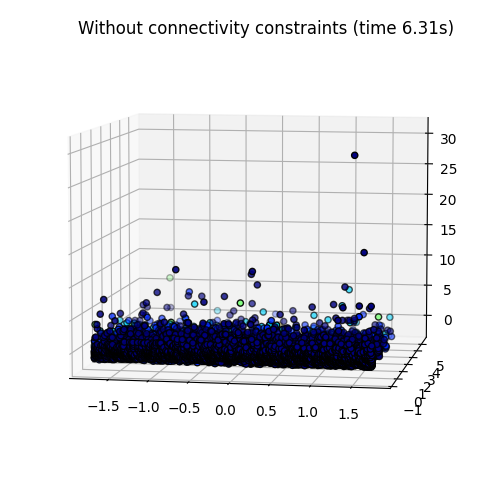

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
X_np = X.to_numpy()
for l in np.unique(label):
    ax1.scatter(
        X_np[label == l, 0],
        X_np[label == l, 1],
        X_np[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )

_ = fig1.suptitle(f"Without connectivity constraints (time {elapsed_time:.2f}s)")

This is a 3D graph. As we can see most of a data set located bellow 0 which mean we can trim more data and potentially improve our results.

# Modeling

Variance Explained by each component:
 [0.19195253 0.05469742 0.03951142 0.03236066 0.02850858 0.02776285
 0.02364054 0.02117548 0.02036052 0.01954096]


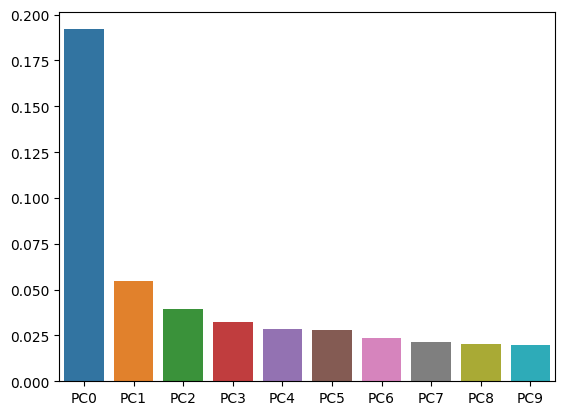

In [ ]:
#@title Analyzing the variance of PCA

var_ratios = pca.explained_variance_ratio_ # Fetch variance ratios
print("Variance Explained by each component:\r\n", var_ratios) # Print variance ratios
sns.barplot(x=pca_db_cols, y=var_ratios) # Chart variance ratios
plt.show()

As we can see PCA of this data set is prety low which is not a positive think. In general we want to see higher variance because higher variance more information PCA can capture. Moreover, variance less than 0.3 indicates that there is a weak coreleation between columns. Hence, more research might be neccessary.

In [ ]:
#@title Applying K-Means
kmn = KMeans(n_clusters = 2, n_init= 25, random_state = 0) # Create KMeans object
kmn.fit(X) # Apply to the data
kmn_lbl = kmn.labels_ # Capture K-Means labels

#Append labels to the DataFrames
X['KMeansLabel'] = kmn_lbl.tolist() # Original Features
pca_db_df['KMeansLabel'] = kmn_lbl.tolist() # Principal Componenets
df1['KMeansLabel'] = kmn_lbl.tolist() # Original DataFrame with class labels, Outcome
pca_db_df

<ipython-input-98-968afdf5afe4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['KMeansLabel'] = kmn_lbl.tolist() # Original DataFrame with class labels, Outcome


PC0       PC1       PC2        PC3       PC4       PC5       PC6  \
0      0.311091 -1.724672 -1.292650  -0.160631  0.779331  1.955693  2.505750   
1     -1.501658  1.496052 -0.585869  -0.267665  0.014753  1.035215  1.378204   
2     23.984753 -0.020259  1.887445  14.907894 -1.383692  0.519762 -1.288649   
3      8.751721  1.698596 -2.166822  -2.470384  0.060426  1.128440  0.738390   
4      8.065604 -4.127803  1.612713  -0.676087  3.970189 -1.924141  1.660415   
...         ...       ...       ...        ...       ...       ...       ...   
8597  -0.681024  0.220952 -3.473548   0.842908  0.441358 -2.873116 -1.305321   
8598   2.695941  2.027519 -1.951521  -0.419680 -0.270925  0.850321 -0.267622   
8599  -2.325932 -0.491475 -0.581451  -0.250065 -0.906459  0.409683  4.095963   
8600  -5.387192  0.216342  0.603408   0.072546 -0.572868  1.020739 -1.745255   
8601  -3.823475 -0.677153  1.634907   0.119240  0.998403  0.922802 -0.912973   

           PC7       PC8       PC9  KMeansLabel  
0    -0.519839  0.558953  0.565886            0  
1    -1.345542  0.656855  0.165969            0  
2    -1.992768 -2.821566 -9.782906            1  
3     2.966040  2.367757 -2.613280            1  
4     0.974584 -0.486454  3.035785            1  
...        ...       ...       ...          ...  
8597 -0.437876 -1.179333  0.276456            0  
8598  0.720964 -0.720006  0.705223            1  
8599 -1.100831  0.281581  0.431484            0  
8600 -1.381568  2.229571 -0.244572            0  
8601 -0.161807  0.041033 -0.343356            0  

[8602 rows x 11 columns]

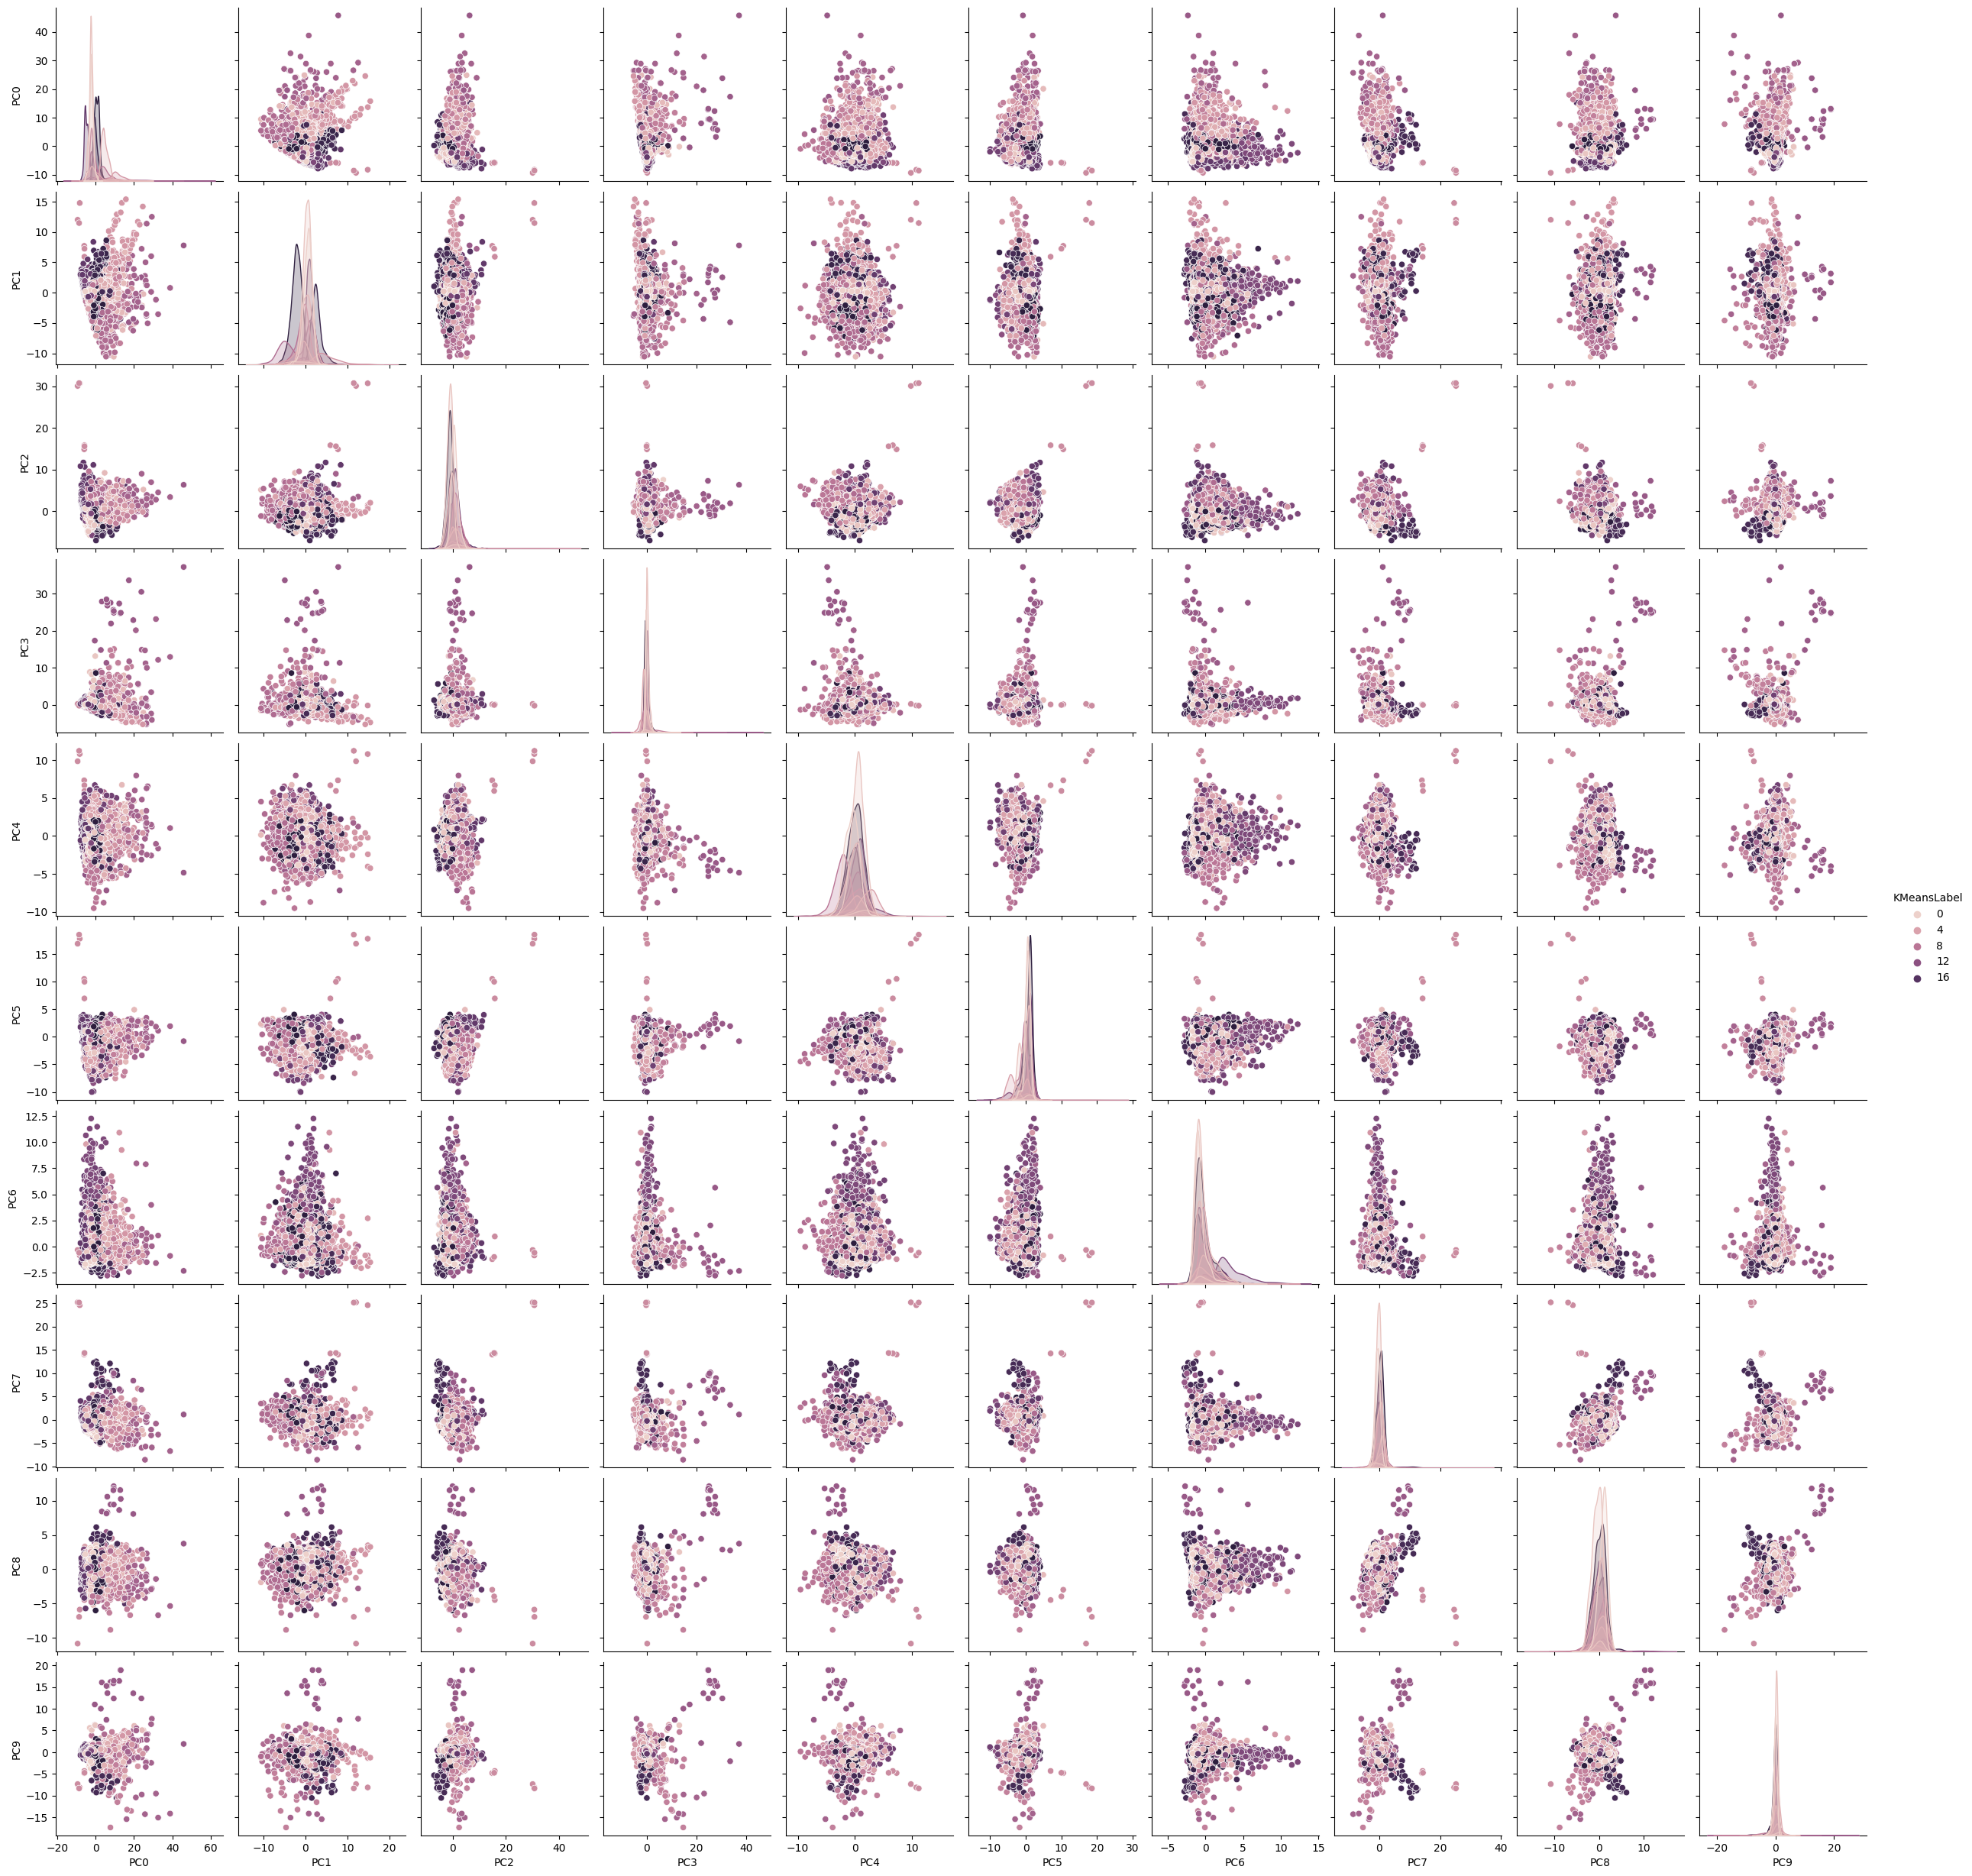

In [ ]:
#@title Visualizing K-Means with PCA
sns.pairplot(pca_db_df, hue='KMeansLabel')


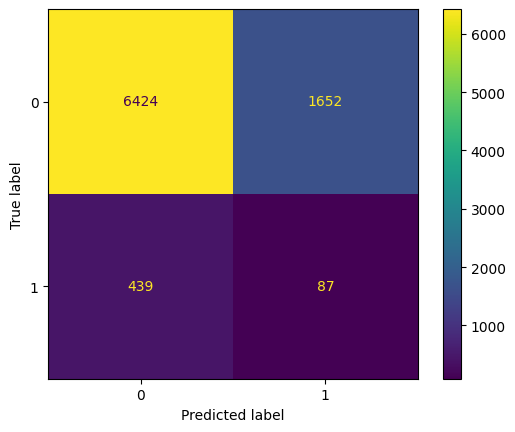

In [ ]:
#@ Compare clusters with class-labels

cm = metrics.confusion_matrix(df1['TARGET'], df1['KMeansLabel']) # Create the confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot(); # Plot the confusion matrix

Those are promising results.

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(df1['TARGET'], df1['KMeansLabel'], average='weighted')
print("F1 Score: ", f1)

F1 Score:  0.8121386447685813


We were able to increase f1-score from 0.7 to 0.81. Note, as we increasing n_cluster f1-score decreasing.

In [ ]:
df_pivot = pd.pivot_table(df1, index='TARGET', columns='KMeansLabel', aggfunc='count')
df_pivot

AMT_ANNUITY       AMT_CREDIT       AMT_GOODS_PRICE        \
KMeansLabel           0     1          0     1               0     1   
TARGET                                                                 
0                  4062  4014       4062  4014            4062  4014   
1                   284   242        284   242             284   242   

            AMT_INCOME_TOTAL       AMT_REQ_CREDIT_BUREAU_DAY        ...  \
KMeansLabel                0     1                         0     1  ...   
TARGET                                                              ...   
0                       4062  4014                      4062  4014  ...   
1                        284   242                       284   242  ...   

            YEARS_BEGINEXPLUATATION_MEDI       YEARS_BEGINEXPLUATATION_MODE  \
KMeansLabel                            0     1                            0   
TARGET                                                                        
0                                   4062  4014                         4062   
1                                    284   242                          284   

                  YEARS_BUILD_AVG       YEARS_BUILD_MEDI        \
KMeansLabel     1               0     1                0     1   
TARGET                                                           
0            4014            4062  4014             4062  4014   
1             242             284   242              284   242   

            YEARS_BUILD_MODE        
KMeansLabel                0     1  
TARGET                              
0                       4062  4014  
1                        284   242  

[2 rows x 242 columns]

In [ ]:
#@title Plot Clustermap

from scipy.cluster import hierarchy

# Compute the linkage matrix
Z = hierarchy.linkage(X, method='ward', metric='euclidean')

# Determine the clusters
k = 2  # Number of clusters
clusters = hierarchy.fcluster(Z, k, criterion='maxclust')

# Print the cluster assignments
print(clusters)


[1 1 2 ... 1 1 1]


In [ ]:
# Compute the linkage matrix
Z = hierarchy.linkage(X, method='ward', metric='euclidean')


## Compare Dendrogram to CART

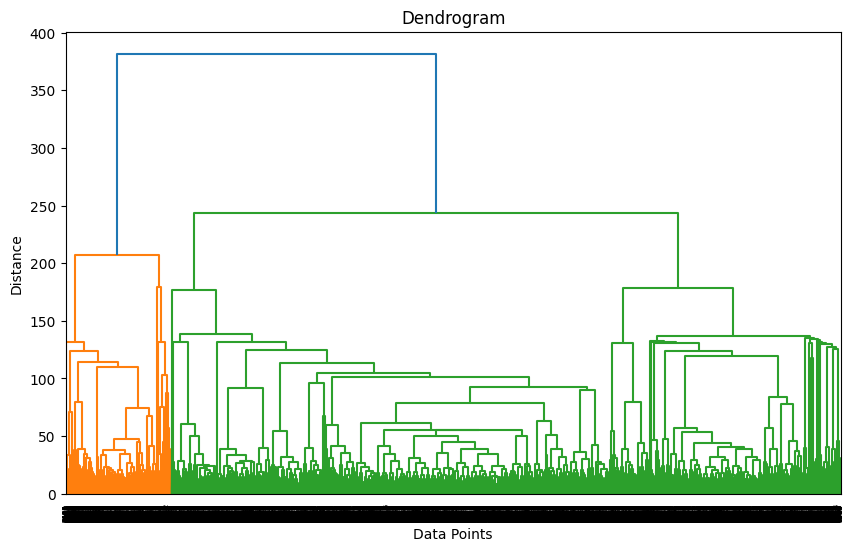

In [ ]:
import matplotlib.pyplot as plt
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dn = hierarchy.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


When we comparied produced graph from Assignment 2 (CART) and our dendrogram we were able to identify a few key differences. Dendrogram does show us its chocies, it show us how many possibilities there are, but this is it. Is not as informative as CART. Moreover, CART does not need to assume that our data set has cylindrical shape.

In [ ]:
df3 = X.join(df1['TARGET'])

In [ ]:
# Calculate the distribution of 'TARGET' within each cluster
df_distribution = df3.groupby('KMeansLabel')['TARGET'].value_counts(normalize=True).unstack()

# Print the distribution
print(df_distribution)

TARGET            0.0       1.0
KMeansLabel                    
0            0.966667  0.033333
1            0.953488  0.046512
2            1.000000       NaN
3            0.882353  0.117647
4            0.875000  0.125000
5            0.857143  0.142857
8            0.909091  0.090909
9            1.000000       NaN
10           1.000000       NaN
11           1.000000       NaN
13           0.833333  0.166667
14           1.000000       NaN
15           0.937500  0.062500
17           1.000000       NaN
18           1.000000       NaN
19           0.969697  0.030303


# Summary

Visualize the PCA. What does this tell you about the density of the data? </br>
Overal PCA analysies shows that columns have a smakk veriance which we were sencing after looking at initial description and mean and std of each columns. Moreover, it showed us that multiple data set are more of a eliptical shape rather than spherical. It is possible that polar coordinates could produce better results or we need to trim the data. </br>
Use hierarchical clustering, visualize the tree and determine the best “cut”. What distance measure did you use? Why? Compare the branching order to the CART from module 2. </br>
It was difficult to determin the best cut. As a result, we decieded to stick with a standard parameter. </br>
Cluster the same data using K-means.
Why did you choose that K and type of distance?
What does this tell you about the data?</br>
We chose k to be 2 after utilizing both Elbow and Silhouette methods. We did not know which parameter would produce better results since both of those methods did contrudict ot each other. As a reuslt, we build 2 models with k = 2 and k = 160. At k = 2 our f1-score is 0.81 while at k = 160 f-score is ~ 0.4. What's for a distance we chose to stick with a standard Euclidean distance since it is not clear if data set is eliptical or spherical. Moreover, after detailed analysies we tend to believe that there are truly only 2 clusters that mixed with other smaller clusters. As a result it creats an elusion of eliptical shape. We recommend to perform another independent anlysies with Manhaten or Tangent methods. More research must be done.

Over K-mean shows that while it produces smaller accuracy than XGBoost. K-mean does produce f1-score significanetelly higher than XGBoost. As of right now we recommend to utilize K-mean algorithm produced here a specially when we were able to produce better result than a winner of kaggle competition. They are claming that reliability of their model is between 0.79 - 0.80 while our model's reliability is >= 0.81. Moreover, our data does not require 13222 second of pretraining and still can be improved.